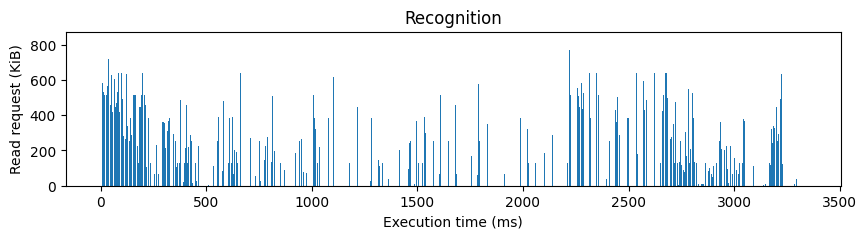

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f = open('./output.csv','r', encoding='utf-8')
rdr = csv.reader(f)
s = 0
lines = []
micro = []
request = [] 

for line in rdr:
    if line[0] == " RA":
        if line[1] == 'D':
            lines.append([int(line[2]),int(line[5])]) # nanosec, transfered size
            # print("OK")

elasped_time = lines[-1][0]

for line in lines:
    
    ms = int(line[0] / 1000000) # ms로 변환
    #ms = int(line[0] / 1000) # us로 변환 \ 너무 오래 걸림 /
    micro.append(ms)
    request.append(line[1] / 1024) # byte to kb


blk_request = []
for i in range(0, micro[-1]):
    blk_request.append(0)

for i in range(0, len(micro)-1):
    idx = micro[i]
    blk_request[idx] += request[i]
    


#print(elasped_time)

f.close()

fig = plt.figure(figsize=(10,2)) ## 캔버스 생성
fig.set_facecolor('white') ## 배경색 설정

x = np.arange(len(blk_request))
plt.bar(x, blk_request)
#plt.yscale("symlog")
 
plt.title('Recognition')
plt.xlabel("Execution time (ms)")
plt.ylabel("Read request (KiB)")
plt.show()